In [ ]:
import torch 
import matplotlib 
from matplotlib import pyplot as plt

In [ ]:
def create_linear(n: int, a: float, b: float) -> list:
  x = torch.arange(10, 210, step=200./n).reshape(-1, 1) # Tạo ra 1 tensor từ 10 đến 210 với step = 200/n, reshape(-1, 1) là để chuyển thành ma trận 1 cột
  x = x + torch.randn_like(x) * 10                      # Thêm nhiễu vào x với độ lệch chuẩn = 10, randn là random theo phân phối chuẩn   
  y = a * x + b                                         # Tạo ra y = ax + b
  y = y + torch.randn_like(y) * 40                      # Thêm nhiễu vào y với độ lệch chuẩn = 40

  return x, y

In [ ]:
def create_quad(n: int, a: float, b: float, c: float) -> list:
  x = torch.arange(-1, 1, step=2./n).reshape(-1, 1) # Tạo ra 1 tensor từ -1 đến 1 với step = 2/n, reshape(-1, 1) là để chuyển thành ma trận 1 cột
  x = x + torch.randn_like(x) / 3                   # Thêm nhiễu vào x với độ lệch chuẩn = 1/3, randn là random theo phân phối chuẩn
  y = a * x * x + b * x + c                         # Tạo ra y = ax^2 + bx + c
  y = y + torch.randn_like(y) / 3                   # Thêm nhiễu vào y với độ lệch chuẩn = 1/3

  return x, y

In [ ]:
x, y = create_linear(n=100, a=2, b=10) # Tạo ra 100 điểm dữ liệu theo hàm tuyến tính y = 2x + 10

In [ ]:
x_test, y_test = create_linear(n=100, a=2, b=10) # Tạo ra 100 điểm dữ liệu theo hàm tuyến tính y = 2x + 10

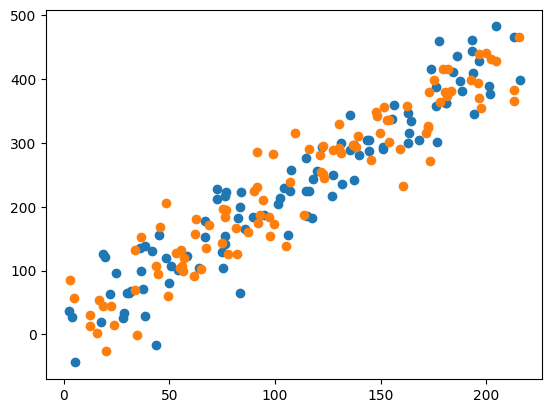

In [ ]:
plt.scatter(x, y)
plt.scatter(x_test, y_test)

In [ ]:
w = torch.randn(2, 1)
w

tensor([[-0.0866],
        [-0.8166]])

In [ ]:
def predict(x, w): # Hàm dự đoán
  y_hat = x * w[1] + w[0]   # Tính y_hat = w0 + w1*x
  return y_hat

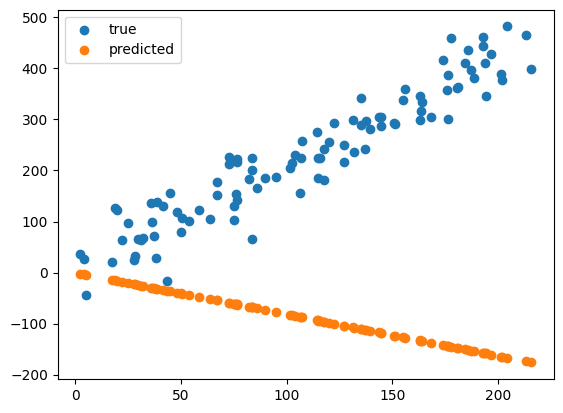

In [ ]:
y_hat = predict(x, w) # Dự đoán y_hat với w0, w1 ngẫu nhiên
fig, ax = plt.subplots(1, 1) # Tạo ra 1 figure với 1 row và 1 column
ax.scatter(x, y, label='true')
ax.scatter(x, y_hat, label='predicted')
ax.legend()

In [ ]:
def mse_loss(y_hat, y): # Hàm loss
  diff = y_hat - y      # Tính độ chênh lệch giữa y_hat và y
  diff = diff.pow(2)    # Tính bình phương độ chênh lệch
  diff = diff.mean()    # Tính trung bình
  return diff 

In [ ]:
print(mse_loss(y_hat, y))

tensor(131021.1562)


In [ ]:
def normalize(x, mean=None, std=None): # Hàm chuẩn hóa dữ liệu
  if mean is None:
    mean = x.mean(dim=0, keepdim=True) # Tính mean theo cột
  if std is None:
    std = x.std(dim=0, keepdim=True)  # Tính std theo cột
  x = x - mean                        # Chuẩn hóa theo công thức (x - mean) / std
  x = x / std                         # Chuẩn hóa theo công thức (x - mean) / std
  return x, mean, std 

In [ ]:
x_normalized, x_mean, x_std = normalize(x) # Chuẩn hóa dữ liệu x

In [ ]:
y_normalized, y_mean, y_std = normalize(y) # Chuẩn hóa dữ liệu y

In [ ]:
y_hat_normalized, _, _ = normalize(y_hat, y_mean, y_std) # Chuẩn hóa dữ liệu y_hat

In [ ]:
x_test_normalized, _, _ = normalize(x_test, mean=x_mean, std=x_std) # Chuẩn hóa dữ liệu x_test
y_test_normalized, _, _ = normalize(y_test, mean=y_mean, std=y_std) # Chuẩn hóa dữ liệu y_test

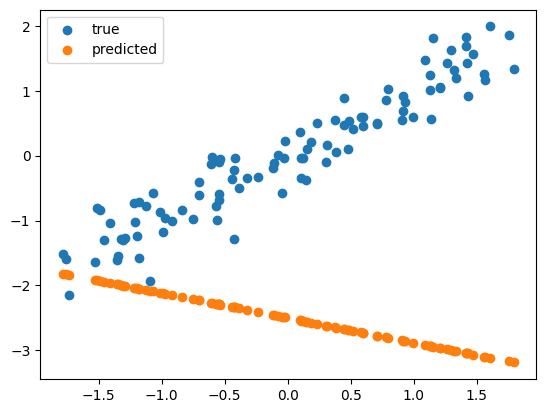

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.scatter(x_normalized, y_normalized, label='true')    
ax.scatter(x_normalized, y_hat_normalized, label='predicted')
ax.legend()

In [ ]:
mse_loss(y_hat_normalized, y_normalized) # Tính loss

tensor(8.1174)

In [ ]:
def train(x, y, x_test, y_test, w, nepoch=100, lr=1e-3): # Hàm train với nepoch là số lần lặp, lr là learning rate
  ones = torch.ones_like(x)                   # Tạo ra 1 tensor với shape giống x nhưng toàn 1
  x = torch.cat([ones, x], dim=1)             # Nối x với ones theo chiều dọc
  ones = torch.ones_like(x_test)              # Tạo ra 1 tensor với shape giống x_test nhưng toàn 1
  x_test = torch.cat([ones, x_test], dim=1)   # Nối x_test với ones theo chiều dọc
  print(x.size())                             # In ra shape của x
  losses = []                                 # Khởi tạo losses
  test_losses = []                            # Khởi tạo test_losses    
  for ei in range(nepoch):                    # epoch là số lần lặp 
    y_hat = x @ w                             # Tính y_hat = x*w
    lossi = mse_loss(y_hat, y)                # Tính loss   

    y_hat_test = x_test @ w                   # Tính y_hat_test = x_test*w
    test_lossi = mse_loss(y_hat_test, y_test) # Tính test_loss
    grad = (x.T @ (y_hat - y)) / x.size(0)    # Tính gradient
    w = w - lr * grad                         # Cập nhật w
    losses.append(lossi.item())               # Thêm lossi vào losses
    test_losses.append(test_lossi.item())     # Thêm test_lossi vào test_losses
  return w, losses, test_losses               # Trả về w, losses, test_losses

In [ ]:
w = torch.randn(2, 1)
w, losses, test_losses = train(x_normalized, y_normalized, x_test_normalized, y_test_normalized, w, nepoch=1000, lr=2)

# w, losses, test_losses = train(x, y, x_test,  y_test, w, nepoch=1000, lr=1e-4)

torch.Size([100, 2])


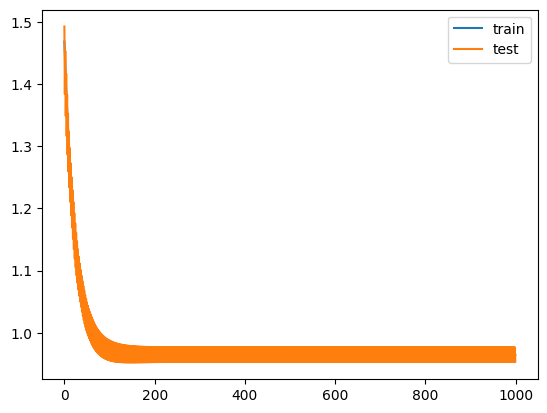

In [ ]:
plt.plot(losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()

In [ ]:
y_hat_normalized = x_normalized * w[1] + w[0] 

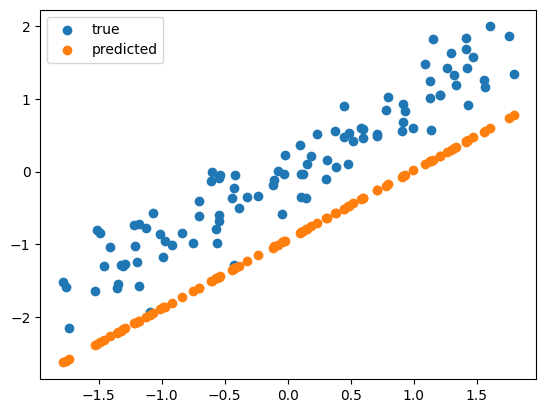

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.scatter(x_normalized, y_normalized, label='true')
ax.scatter(x_normalized, y_hat_normalized, label='predicted')
ax.legend()

In [ ]:
y_test_hat_normalized = x_test_normalized * w[1] + w[0]

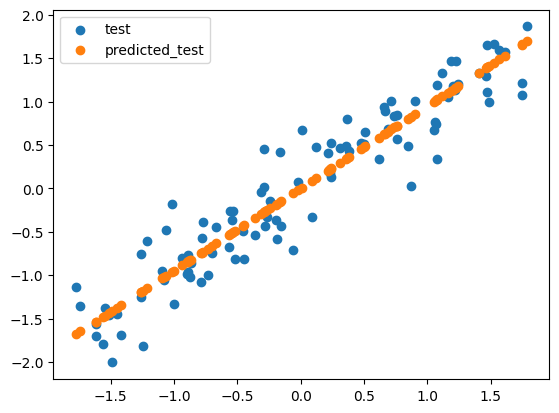

In [ ]:
fig, ax = plt.subplots(1, 1)
# ax.scatter(x_normalized, y_normalized, label='train')
# ax.scatter(x_normalized, y_hat_normalized, label='predicted_train')
ax.scatter(x_test_normalized, y_test_normalized, label='test')
ax.scatter(x_test_normalized, y_test_hat_normalized, label='predicted_test')
ax.legend()

In [ ]:
def min_max_norm(x, xmin=None, xmax=None): # Hàm chuẩn hóa dữ liệu về khoảng [min, max]
  if xmin is None:
    xmin, _ = x.min(dim=0, keepdim=True)
  if xmax is None: 
    xmax, _ = x.max(dim=0, keepdim=True)
  diff = xmax - xmin 
  x = 2 * (x - xmin) / diff - 1
  return x, xmin, xmax 

In [ ]:
x_quad, y_quad = create_quad(a=2, b=3, c=1, n=300)
x_quad_test, y_quad_test = create_quad(a=2, b=3, c=1, n=100)

x_quad_norm, x_quad_min, x_quad_max = min_max_norm(x_quad)
y_quad_norm, y_quad_min, y_quad_max = min_max_norm(y_quad)
x_quad_test_norm, _, _ = min_max_norm(x_quad_test, x_quad_min, x_quad_max) 
y_quad_test_norm, _, _ = min_max_norm(y_quad_test, y_quad_min, y_quad_max) 

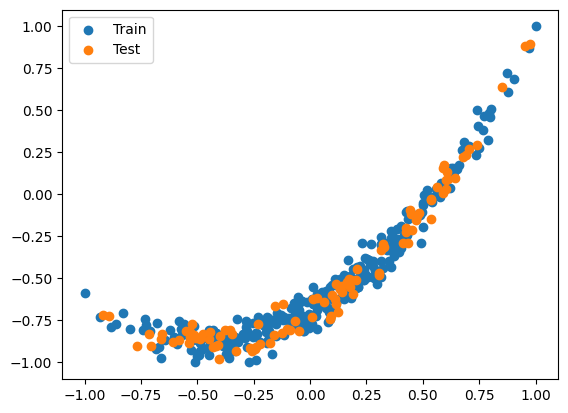

In [ ]:
plt.scatter(x_quad_norm, y_quad_norm, label='Train')
plt.scatter(x_quad_test_norm, y_quad_test_norm, label='Test')
plt.legend()

In [ ]:
def train(x, y, x_test, y_test, w, nepoch=100, lr=1e-3, deg=11, Lambda=0.001): # Hàm train với nepoch là số lần lặp, lr là learning rate, deg là bậc của đa thức, Lambda là hệ số của regularization (regularization là để tránh overfitting, )
  ones = torch.ones_like(x)

  x = torch.cat([x.pow(i) for i in range(deg)], dim=1)
  ones = torch.ones_like(x_test)
  x_test = torch.cat([x_test.pow(i) for i in range(deg)], dim=1)
  print(x.size())
  losses = []
  test_losses = []
  for ei in range(nepoch):
    y_hat = x @ w 
    lossi = mse_loss(y_hat, y) + Lambda * w.pow(2).sum()

    # d mse / dw = from the previous lecture
    # d reg / dw = 2 * Lambda * w
    # dL / dw = d mse / dw + d reg / dw 

    y_hat_test = x_test @ w
    test_lossi = mse_loss(y_hat_test, y_test)
    grad = (x.T @ (y_hat - y)) / x.size(0) # + 2 * Lambda * w 
    w = w - lr * grad 
    losses.append(lossi.item())
    test_losses.append(test_lossi.item())
  return w, losses, test_losses

In [ ]:
torch.random.manual_seed(0)
deg = 1000
w = torch.randn(deg, 1)
w, losses, test_losses = train(x=x_quad_norm, y=y_quad_norm, 
                               x_test=x_quad_test_norm, 
                               y_test=y_quad_test_norm, 
                               w=w, lr=1e-2, nepoch=10000, deg=deg, Lambda=0.01)

torch.Size([300, 1000])


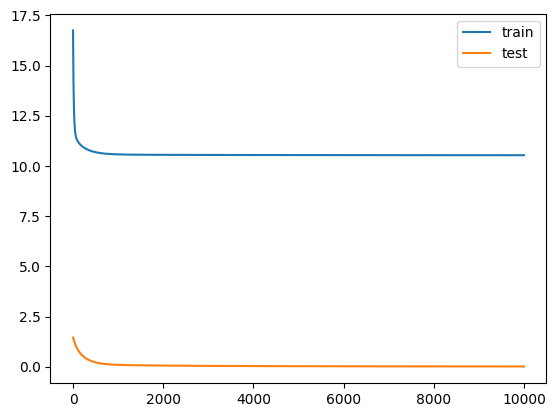

In [ ]:
plt.plot(losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()

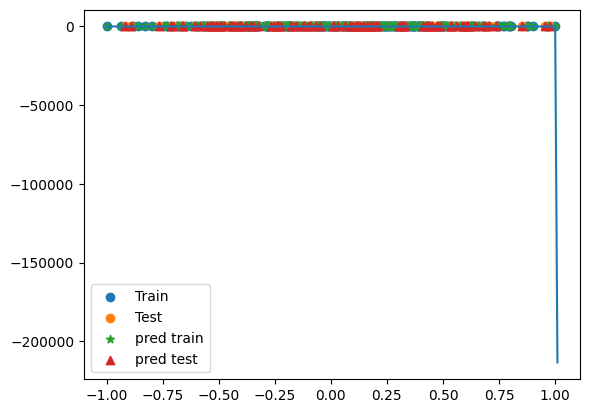

In [ ]:
x_quad_deg = torch.cat([x_quad_norm.pow(i) for i in range(deg)], dim=1)
x_quad_test_deg = torch.cat([x_quad_test_norm.pow(i) for i in range(deg)], dim=1)

x_linspace = torch.arange(-1., 1.02, 0.01).reshape(-1, 1)
x_lindeg = torch.cat([x_linspace.pow(i) for i in range(deg)], dim=1)
y_linpred = x_lindeg @ w 

plt.plot(x_linspace, y_linpred)


y_quad_pred = x_quad_deg @ w 
y_quad_test_pred = x_quad_test_deg @ w

plt.scatter(x_quad_norm, y_quad_norm, label='Train')
plt.scatter(x_quad_test_norm, y_quad_test_norm, label='Test')

plt.scatter(x_quad_norm, y_quad_pred, marker='*', label='pred train')
plt.scatter(x_quad_test_norm, y_quad_test_pred, marker='^', label='pred test')
plt.legend()